<h1><center>Astronomical Data(Tabular) - Visualisation</h1>



In [44]:
# importing required liberaries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [45]:
# read the file using pandas.
df = pd.read_csv('https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-')
df.head(10) # top 10 rows of the dataframe.

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
5,2840,0.000650,0.1100,16.98,0,Red,M
6,2637,0.000730,0.1270,17.22,0,Red,M
7,2600,0.000400,0.0960,17.40,0,Red,M
8,2650,0.000690,0.1100,17.45,0,Red,M
9,2700,0.000180,0.1300,16.05,0,Red,M


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


### Observations
**1)** Dataset consists of 240 rows, 7 columns,
- *Absolute Temperature (in K)*    
- *Relative Luminosity (L/Lo)*
- *Relative Radius (R/Ro)*
- *Absolute Magnitude (Mv)*
- *Star Color*
- *Spectral Class*
- *Star Type*
    
Here,
- *Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)*
- *Ro = 6.9551 x 10^8 m (Avg Radius of Sun)*
    
**2)** It consists of some different features of stars. Information on the star type is given below,       
- **0** → Brown Dwarf       
- **1** → Red Dwarf       
- **2** → White Dwarf      
- **3** → Main Sequence    
- **4** → Supergiants      
- **5** → Hypergiants

**3)** Information about the spectral class is given below,

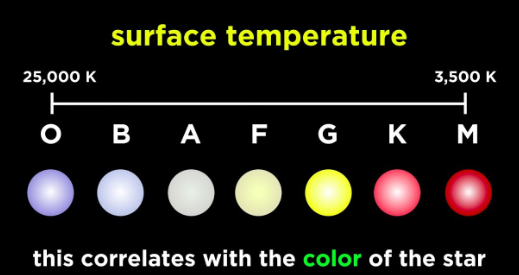

### Visualise the count of star for each type of star


Matplotlib


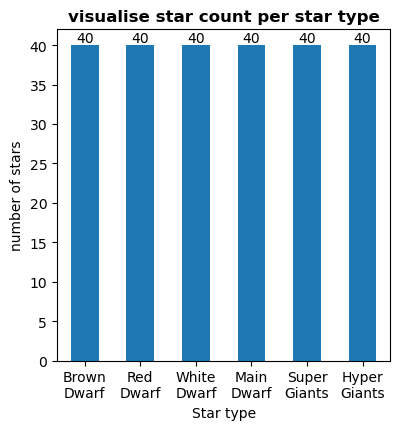

In [60]:
# bar graph to visualise count of stars with respective type.
plt.figure(figsize = (4.3,4.3)) #adjusts the figure size(figsize = (height, width)).
plt.style.use('default') # changing the background.
ax = df["Star type"].value_counts().plot(kind="bar")
ax.bar_label(ax.containers[0], color = "black") #label the top value of the each bar graph.
plt.title("visualise star count per star type", color = "black", weight = "bold")
plt.yticks(color = "black") # change the y-axis value to different color.
plt.ylabel("number of stars", color = "black", fontsize = 10)
plt.xticks(ticks = [0, 1, 2, 3, 4, 5], 
           labels = ["Brown\nDwarf", "Red\nDwarf", "White\nDwarf", "Main\nDwarf", "Super\nGiants", "Hyper\nGiants"],
           rotation = 0)
plt.show()

# Using seaborn to Visualise star count with respect to star color

Seaborn

&bull; Seaborn uses all functionalities of matplotlib.

&bull; Moreover, it is easily customizable.

In [48]:
x_axis = df["Star color"].value_counts().index
x_axis

Index(['Red', 'Blue', 'Blue-White', 'Yellow-White', 'White'], dtype='object', name='Star color')

In [49]:
y_axis = df["Star color"].value_counts()
y_axis

Star color
Red             116
Blue             56
Blue-White       41
Yellow-White     15
White            12
Name: count, dtype: int64

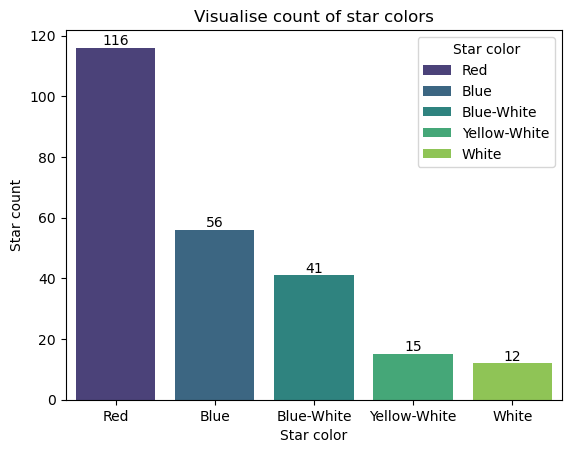

In [50]:
#visualising the star data using seaborn
a = sns.barplot(x = x_axis,
                y = y_axis, 
                palette="viridis", legend = True,
                hue=df["Star color"].value_counts().index
               )
plt.title("Visualise count of star colors", color = "black")
for i in range(5):
    a.bar_label(a.containers[i], color="black") # show the top values for each bar graph
    
plt.ylabel("Star count", fontsize=10)
plt.show()

# Using Plotly to plot above graph 


Plotly (creates more interactive version of the above graph)

In [51]:
color_counts = df["Star color"].value_counts().reset_index()
color_counts

,Star color,count
0,Red,116
1,Blue,56
2,Blue-White,41
3,Yellow-White,15
4,White,12


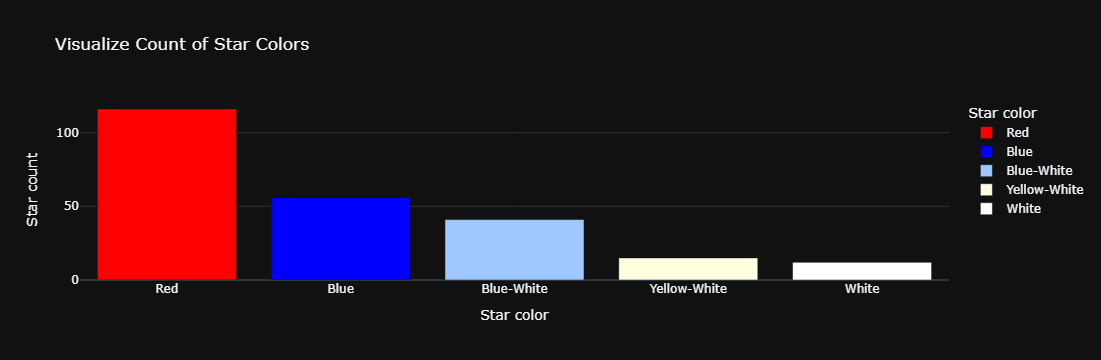

In [67]:
RED = "#FF0000"
BLUE = "#0000FF"
BLUE_WHITE = "#A0C8FF" 
YELLOW_WHITE = "#FFFFE0" 
WHITE = "#FFFFFF"

# Define custom colors
star_colors = [RED, BLUE, BLUE_WHITE, YELLOW_WHITE, WHITE]

# Create a bar graph with custom colors
fig = px.bar(color_counts, x='Star color', y='Count',
             color='Star color',
             color_discrete_sequence=star_colors,
             title='Visualize Count of Star Colors')

# Show the plot
fig.update_layout(yaxis_title="Star count", template='plotly_dark')
fig.show()

# Visualise outliners by creating box plot for numeric data


***Outliners***:Outliers are observations that deviate markedly from the other data points in a dataset, often lying outside the overall pattern.

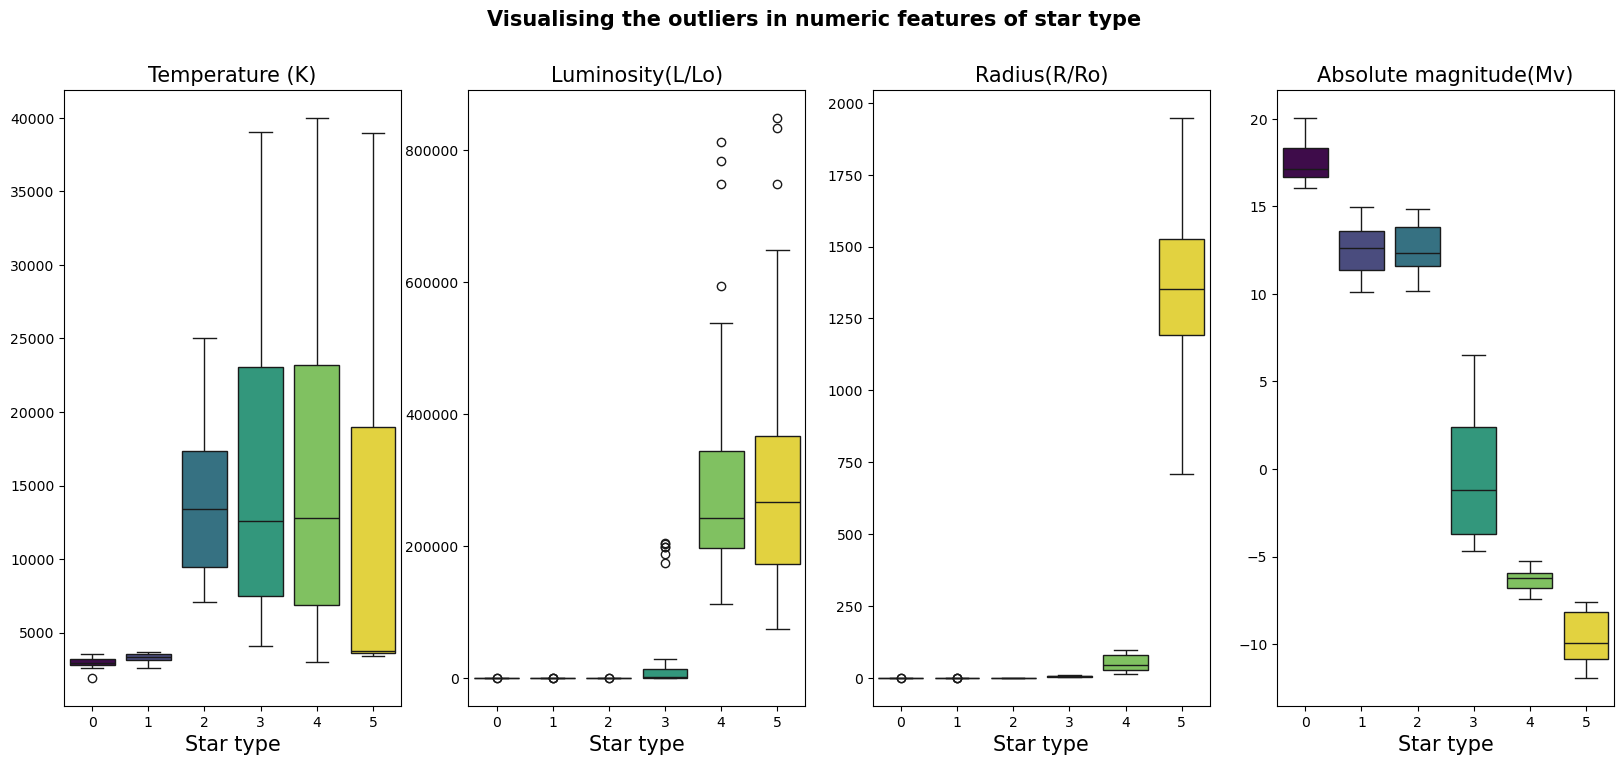

In [72]:
# Visualise Outliners in the data
plt.figure(figsize=(20,8)) 
plt.style.use("default")
plt.suptitle("Visualising the outliers in numeric features of star type", color = "black", weight = "bold", fontsize=15)
for i in range(4):
    plt.subplot(1,4,i+1)
    sns.boxplot(x = df["Star type"], y = df.iloc[:,i], palette="viridis", legend = False, hue = df["Star type"])
    plt.ylabel('')
    plt.title(df.columns[i], color="black",fontsize=15)
    plt.xlabel("Star type",fontsize = 15)
plt.show()

As shown in above box plot there are few outliners in every figure represented by 'o' on the graph.

Cause of these outliners:

1. **Natural Variation**: Some stars naturally exhibit extreme properties due to their unique compositions or evolutionary stages.
2. **Measurement Errors**: There may have been inaccuracies in data collection or recording processes.
3. **Unusual Star Types**: Stars with atypical properties may appear as outliers.
4. **Astronomical Events**: Events like supernovae can create extreme values.

# Using line plots to visualise the variation of numeric features of the data

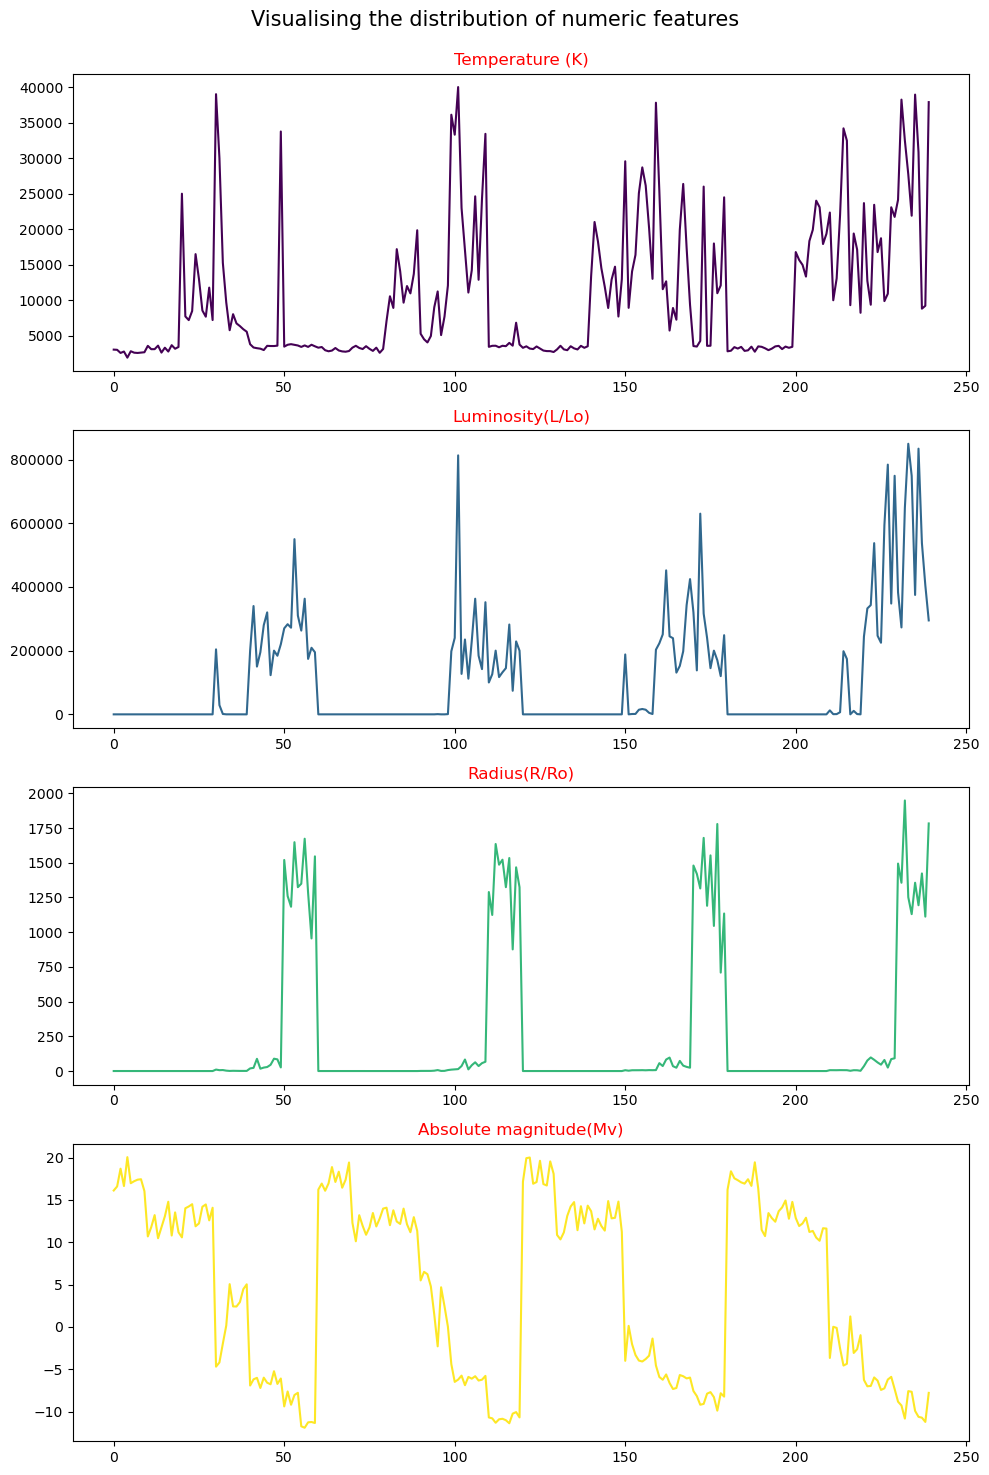

In [54]:
# line plot
DARK_PURPLE = "#440154"
BLUE = "#31688e"
GREEN = "#35b779"
YELLOW = "#fde725"

colors = [DARK_PURPLE, BLUE, GREEN, YELLOW]
plt.figure(figsize=(10,15))
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.plot(df.iloc[:,i], color = colors[i])
    plt.title(df.columns[i], color="red")
    
plt.suptitle("Visualising the distribution of numeric features\n", color = "black", fontsize=15)
plt.tight_layout()
plt.show()



# Using pair plot to visualise the variation of each numerical feature

Seaborn

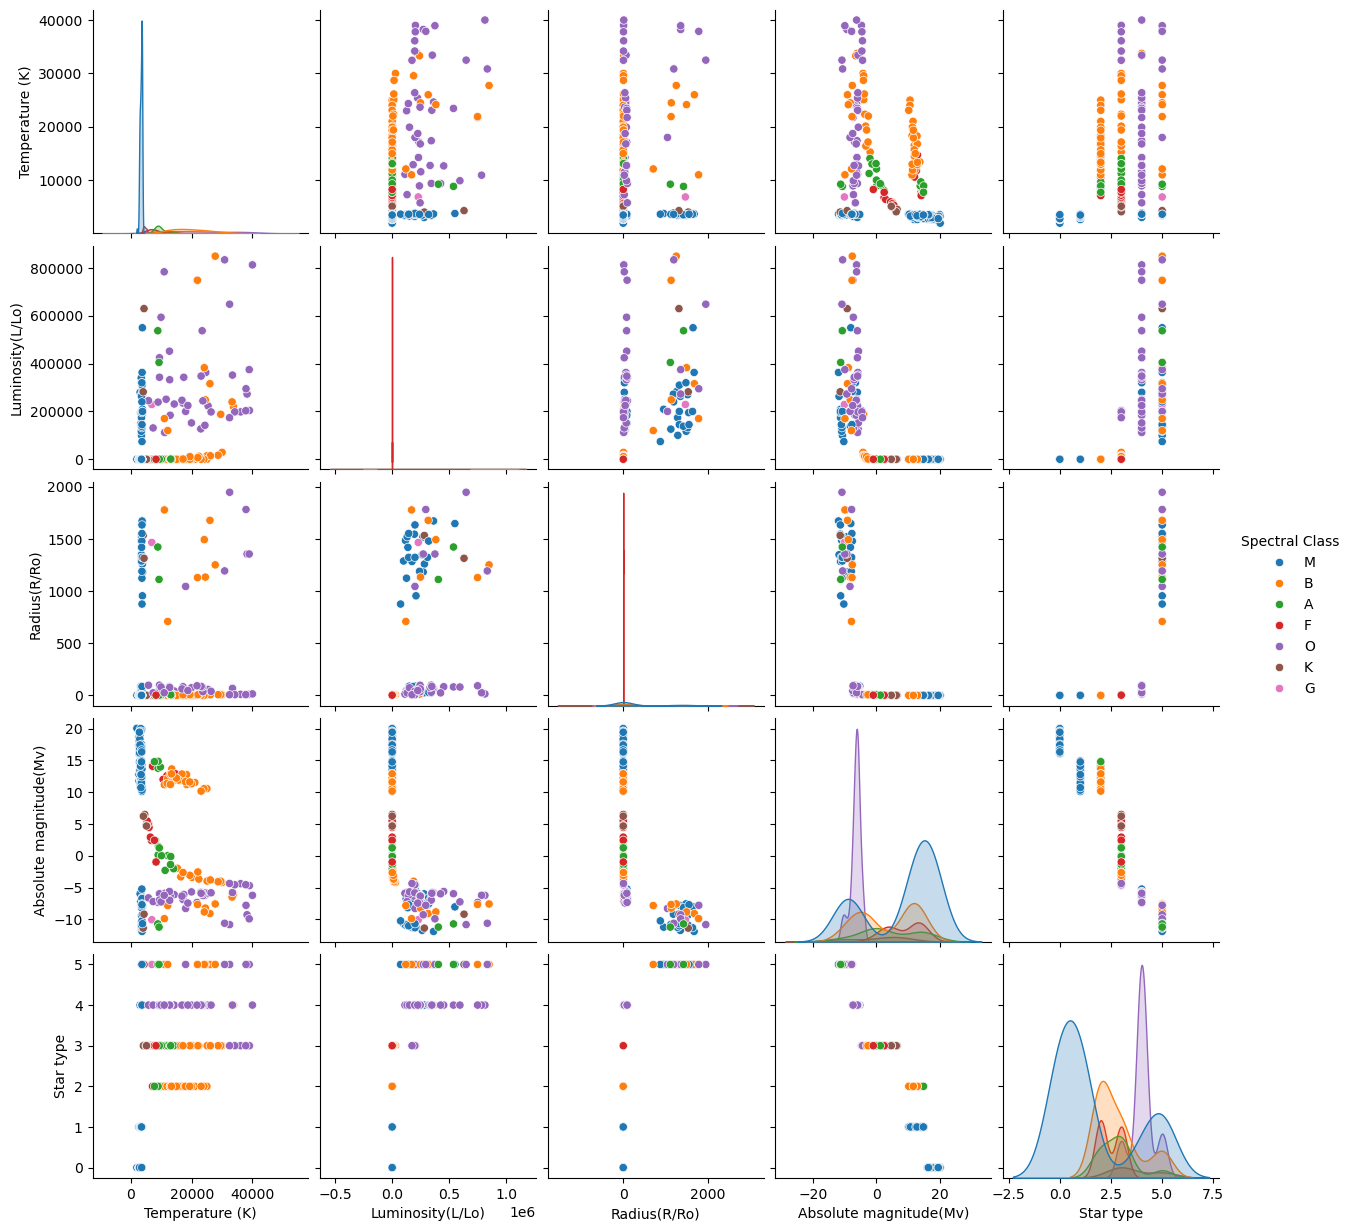

In [55]:
# pair plot
sns.pairplot(df, hue="Spectral Class")
plt.show()

# Creating a scatter plot of HR diagram

This is an HR diagram-

<img src = 'https://www.space.fm/astronomy/images/diagrams/hr.jpg'>

The Hertzsprung-Russell (HR) diagram is a crucial tool in stellar astronomy that plots stars according to their luminosity and surface temperature. It features:

-***Main Sequence***: A continuous band where stars spend most of their lifetimes, fusing hydrogen into helium.

-***Giants and Supergiants***: Stars in later stages of their evolution, found above the main sequence, with high luminosity but lower temperature.

-***White Dwarfs***: Small, hot, but dim stars located below the main sequence.

This diagram helps in understanding the lifecycle of stars and their various evolutionary stages.

**0** → Brown Dwarf      
**1** → Red Dwarf       
**2** → White Dwarf       
**3** → Main Sequence      
**4** → Supergiants      
**5** → Hypergiants

In [62]:
# Arrays to be used in the for loop
star_type = df['Star type'].values
temperature = df['Temperature (K)'].values
abs_mag = df['Absolute magnitude(Mv)'].values

# Python dictionaries - to get properties of star_type
star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'}
}

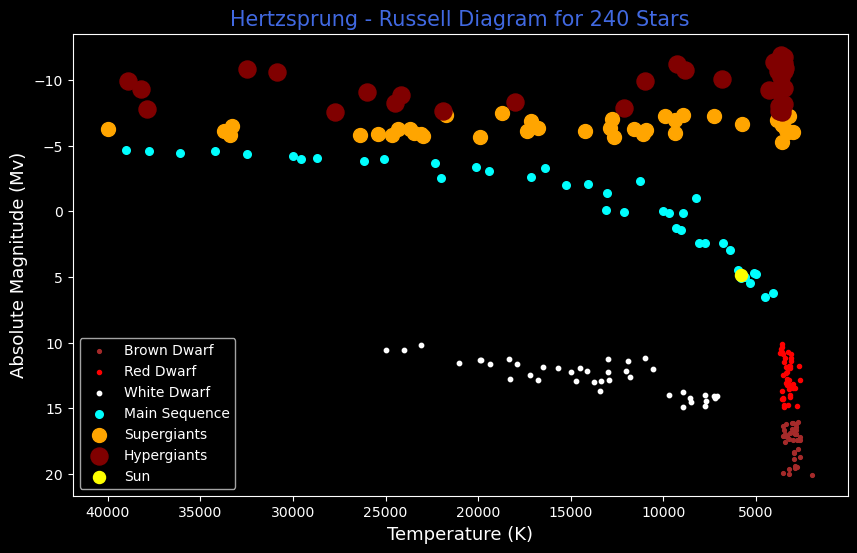

In [63]:
# hr diagram for temp vs abs_mag
axes = []
labels = set()
plt.figure(figsize=(10,6))
plt.style.use("dark_background")
for i in range(len(star_type)):
    properties = star_types[star_type[i]]
    ax = plt.scatter(x=temperature[i], y=abs_mag[i],
                     s=properties["size"],
                     c=properties["color"],
                     marker=properties["marker"],
                     label=properties["label"],)
    if properties["label"] not in labels:
        axes.append(ax)
        labels.add(properties["label"])
        
# add data for sun(to see where the sun is in the diagram).
ax_sun = plt.scatter(5778, 4.83, s=75, c="yellow", marker='o', label="Sun")
axes.append(ax_sun)
labels.add("Sun")

# add title
plt.title(f"Hertzsprung - Russell Diagram for {len(star_type)} Stars", fontsize=15, color='royalblue')
# add x and y labels
plt.ylabel("Absolute Magnitude (Mv)", fontsize=13, color='white')
plt.xlabel("Temperature (K)", fontsize=13, color='white')

plt.legend(handles=axes)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

<h1>More interactive version of above HR Diagram can be created using Plotly</h1>

Plotly

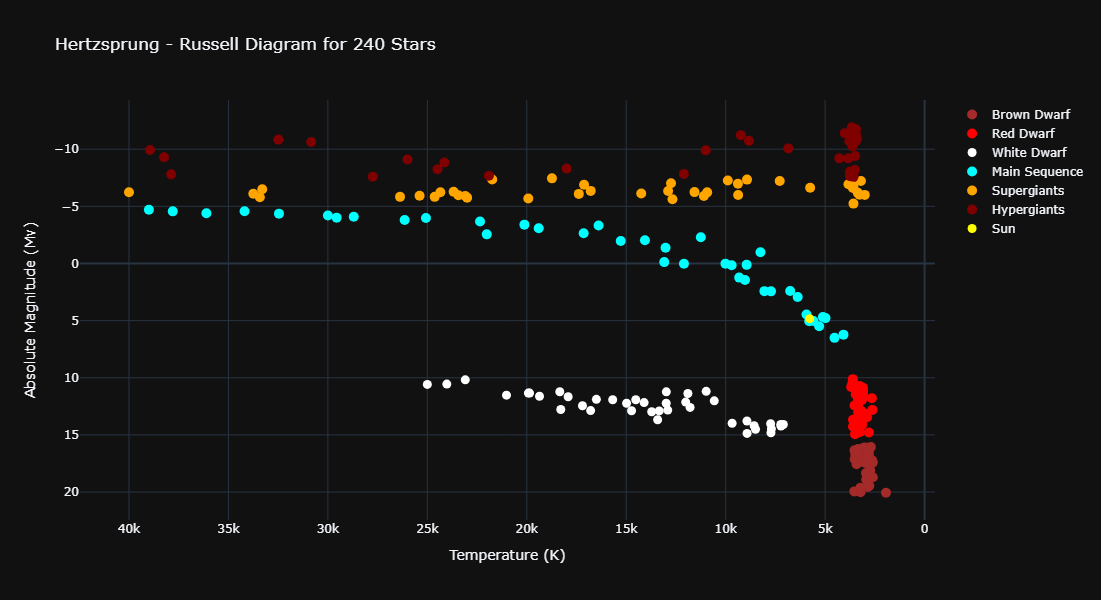

In [73]:
star_type = df['Star type'].values
temperature = df['Temperature (K)'].values
abs_mag = df['Absolute magnitude(Mv)'].values

# Python dictionaries - to get properties of star_type
star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 10},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 10},
    2: {'label': 'White Dwarf', 'color': 'white', 'size': 9},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 10},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 10},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 10}
}


# Create the scatter plot
fig = go.Figure()
labels = set()

# Add stars to the plot
for i in range(len(star_type)):
    add = True
    properties = star_types[star_type[i]]
    if properties["label"] in labels:
        add = False
    labels.add(properties["label"])
    fig.add_trace(go.Scatter(
        x=[temperature[i]],
        y=[abs_mag[i]],
        mode='markers',
        marker=dict(size=properties['size'], color=properties['color']),
        name=properties['label'],
        text=properties['label'],
        showlegend=add
    ))

# Add data for the Sun
fig.add_trace(go.Scatter(
    x=[5778], #Sun's temperatuer(K) = 5778
    y=[4.83], #Sun's Absolute Magnitude(Mv) = 4.83
    mode='markers',
    marker=dict(size=9, color='yellow'),
    name='Sun',
    text='Sun',
    showlegend=True
))

# Update layout
fig.update_layout(
    title=f"Hertzsprung - Russell Diagram for {len(star_type)} Stars",
    xaxis_title="Temperature (K)",
    yaxis_title="Absolute Magnitude (Mv)",
    template='plotly_dark',
    width=1000, 
    height=600,
)

# Invert axes
fig.update_yaxes(autorange="reversed")  # Invert y-axis for Absolute Magnitude
fig.update_xaxes(autorange="reversed")  # Invert x-axis if needed

fig.show()


<h1><center>End</center></h1>